In [3]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


In [4]:
def plot_datetime_strategies(
  datetimes: pd.Series, *,
  time_strategies = tlp.TIME_STRATEGIES):
  """Plot the mapping from datetime with the various time strategies.
  
  Args:
    datetimes: pd.Series containing all the considered datetimes (one per edge)
    time_strategies: Optional; A list containing functions that can map the
      datetime column of the edgelist to a float. See 
      tlp.feature.TIME_STRATEGIES.
  
  Usage:
    tlp.analysis.plot_datetime_strategies(edgelist['datetime'])
  """
  index = pd.to_datetime(
    np.linspace(datetimes.min().value, datetimes.max().value))
  with plt.rc_context({'xtick.top': True, 'ytick.right': True}):
    _, ax = plt.subplots(figsize=(4,4))
    df = pd.DataFrame(
      {str: func(index) for str, func in time_strategies.items()}, 
      index=index)
    df.plot(ax=ax, xlabel='Year', ylabel='Proportion',  
            xlim=datetimes.agg(['min', 'max']), ylim=(0,1))
    
    ax.legend(title='Time strategy') # type: ignore
     # type: ignore

In [5]:
df = pd.read_pickle('data/01/edgelist.pkl')

In [8]:
index = pd.to_datetime(np.linspace(df['datetime'].min().value, df['datetime'].max().value))

In [55]:
index_unix = index.astype(np.int64) / (365*24*3600e9)

In [79]:
np.sqrt(1)

1.0

In [56]:
index_unix

Float64Index([ -32.02180171867072,  -30.38803273162385, -28.754263744576978,
              -27.120494757530107, -25.486725770483233, -23.852956783436355,
              -22.219187796389484, -20.585418809342613, -18.951649822295735,
               -17.31788083524886, -15.684111848201988, -14.050342861155116,
              -12.416573874108241, -10.782804887061365,  -9.149035900014495,
               -7.515266912967623,  -5.881497925920747, -4.2477289388738715,
              -2.6139599518269994, -0.9801909647801279,  0.6535780222667479,
               2.2873470093136237,  3.9211159963604953,   5.554884983407367,
                7.188653970454243,   8.822422957501118,  10.456191944547994,
               12.089960931594861,  13.723729918641737,  15.357498905688614,
                16.99126789273548,  18.625036879782357,   20.25880586682923,
                21.89257485387611,  23.526343840922983,   25.16011282796985,
               26.793881815016725,  28.427650802063603,   30.06141978911047,

In [75]:
def exp(x):
  return .2 + 0.8 * (np.exp(3*(x-min(x))/(max(x)-min(x)))-1) / (np.exp(3)-1)

In [83]:
def sqrt(x):
  return .2 + 0.8 * np.sqrt((x-min(x))/(max(x)-min(x)))

In [84]:
time_strategies['sqrt'] = sqrt

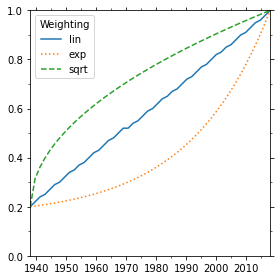

In [95]:
linestyles = ['solid', 'dotted', 'dashed']
with plt.rc_context(rc):
  _, ax = plt.subplots(figsize=(4,4))
  for (strategy_str, strategy_func), linestyle in zip(time_strategies.items(), linestyles):
    ax.plot(index, strategy_func(index_unix), label=strategy_str, linestyle=linestyle)
  ax.legend(title='Weighting')
  ax.set_xlim(min(index), max(index))
  ax.set_ylim((0,1))
  ax.xaxis.set_minor_locator(matplotlib.dates.YearLocator(5))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.1))
  plt.tight_layout()
  plt.savefig('figures/time-strategies.pdf')

In [88]:
rc

{'xtick.top': True, 'ytick.right': True, 'figure.figsize': (4, 4)}